# Data Generation 

Notebook will generate data that will be used for Networks later

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as skl
import sklearn.utils
import IPython.display as ipd
from sklearn.model_selection import train_test_split
import ast

Load all file paths and split them into a train and test set.

In [10]:
file_paths = pd.read_csv('data/all_data_paths.txt', header = None, names = ['file_path'])

train_paths, test_paths = train_test_split(file_paths, test_size=0.33)

file_paths.head()

music_data = pd.read_csv('data/fma_metadata/tracks.csv', skiprows = [0,1,2], 
                         usecols = [0, 6, 8, 11, 26, 39, 41, 44, 47, 52], 
                         names = ['track_id', 'album_id', 'album_listens', 'album_title', 'artist_name',
                                 'track_favorites', 'track_genres', 'track_interest', 'track_listens', 'track_title'])

music_data['track_genres'] = music_data['track_genres'].apply(ast.literal_eval)

music_data.head()


,track_id,album_id,album_listens,album_title,artist_name,track_favorites,track_genres,track_interest,track_listens,track_title
0,2,1,6073,AWOL - A Way Of Life,AWOL,2,[21],4656,1293,Food
1,3,1,6073,AWOL - A Way Of Life,AWOL,1,[21],1470,514,Electric Ave
2,5,1,6073,AWOL - A Way Of Life,AWOL,6,[21],1933,1151,This World
3,10,6,47632,Constant Hitmaker,Kurt Vile,178,[10],54881,50135,Freeway
4,20,4,2710,Niris,Nicky Cook,0,"[76, 103]",978,361,Spiritual Level


In [4]:
for i, path in enumerate(train_paths['file_path']):
    print(path)
    print(i)
    ghj

054/054467.mp3
0


NameError: name 'ghj' is not defined

In [11]:
#get spectrograms and save training data
items_to_keep = 1000000
training_points = 100
labels = np.zeros(training_points)
train_data = np.zeros((training_points, items_to_keep))
# for i in range(len(train_paths)):
# for i, path in enumerate(train_paths['file_path']):
for index in range(100): #just looks at top 100 files
    if i > training_points:
        break
    print(index)
    filename = 'data/fma_small/' + file_paths['file_path'][index]

    y, sr = librosa.load(filename, sr=None, mono=True)
    train_data[index] = y[:items_to_keep]
    print('Duration: {:.2f}s, {} samples'.format(y.shape[-1] / sr, y.size))

#     song_id = file_paths['file_path'][index].rsplit('/')[1].rsplit('.')[0].lstrip('0')
    associated_genres_numeric = music_data[music_data['track_id'] == int(song_id)]['track_genres'].item()
#     associated_genres = [genre_df[genre_df['genre_id'] == num]['title'].item() for num in associated_genres_numeric]
    
    labels[index] = associated_genres_numeric[0]
    

0


/root/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Duration: 29.98s, 1321967 samples
1


/root/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KeyboardInterrupt: 

In [ ]:
#save training data

np.save('data/train_data.npy', train_data)

[ 0.          0.          0.         ... -0.05064392 -0.04957581
 -0.0406189 ]


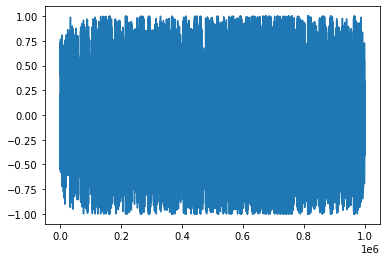

In [28]:
print(train_data[0])
plt.plot(train_data[0])

Load in the music data we are interested in using.

In [3]:
music_data = pd.read_csv('data/fma_metadata/tracks.csv', skiprows = [0,1,2], 
                         usecols = [0, 6, 8, 11, 26, 39, 41, 44, 47, 52], 
                         names = ['track_id', 'album_id', 'album_listens', 'album_title', 'artist_name',
                                 'track_favorites', 'track_genres', 'track_interest', 'track_listens', 'track_title'])

music_data['track_genres'] = music_data['track_genres'].apply(ast.literal_eval)

music_data.head()


,track_id,album_id,album_listens,album_title,artist_name,track_favorites,track_genres,track_interest,track_listens,track_title
0,2,1,6073,AWOL - A Way Of Life,AWOL,2,[21],4656,1293,Food
1,3,1,6073,AWOL - A Way Of Life,AWOL,1,[21],1470,514,Electric Ave
2,5,1,6073,AWOL - A Way Of Life,AWOL,6,[21],1933,1151,This World
3,10,6,47632,Constant Hitmaker,Kurt Vile,178,[10],54881,50135,Freeway
4,20,4,2710,Niris,Nicky Cook,0,"[76, 103]",978,361,Spiritual Level


Load in the genre information.

In [4]:
genre_df = pd.read_csv('data/fma_metadata/genres.csv', usecols=[0, 3])
genre_df.head()

,genre_id,title
0,1,Avant-Garde
1,2,International
2,3,Blues
3,4,Jazz
4,5,Classical


Play a song.

In [12]:
index = 7999

In [13]:
filename = 'data/fma_small/' + file_paths['file_path'][index]

y, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(y.shape[-1] / sr, y.size))

start, end = 7, 17
# ipd.Audio(data=x[start*sr:end*sr], rate=sr)
ipd.Audio(data = y, rate = sr)

/root/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Duration: 29.98s, 1321967 samples


In [7]:
index =7999

Return associated genres

In [8]:
song_id = file_paths['file_path'][index].rsplit('/')[1].rsplit('.')[0].lstrip('0')
associated_genres_numeric = music_data[music_data['track_id'] == int(song_id)]['track_genres'].item()
associated_genres = [genre_df[genre_df['genre_id'] == num]['title'].item() for num in associated_genres_numeric]

associated_genres

NameError: name 'music_data' is not defined

Display wave plots and spectrograms

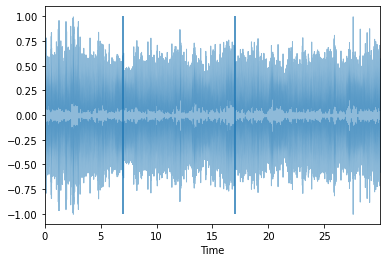

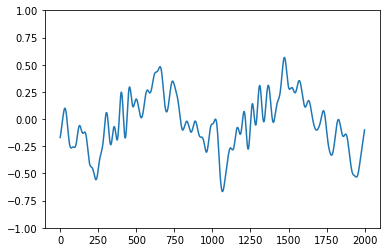

In [8]:
librosa.display.waveplot(y, sr, alpha=0.5);
plt.vlines([start, end], -1, 1)

start = len(y) // 2
plt.figure()
plt.plot(y[start:start+2000])
plt.ylim((-1, 1));

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

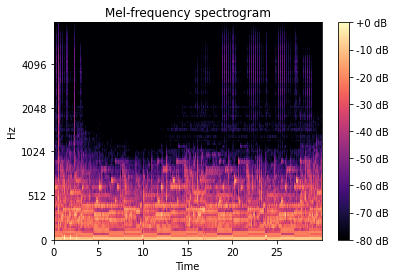

In [9]:
mel = librosa.feature.melspectrogram(y=y, sr = sr, n_fft = 2048, hop_length = 512)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')